In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)

seed = 7

np.random.seed(seed)

period = '5min'
pair = 'BTC_ETH'
lag = 12

Using TensorFlow backend.


In [2]:
df = pd.read_csv('./datasets/{}/{}_train.csv'.format(period, pair), index_col=0)
df.head()

,open,high,low,close,volume
datetime,,,,,
1474781100,0.021633,0.021646,0.021619,0.021619,5.092732
1495086900,0.049629,0.049847,0.049500,0.049500,91.973196
1479183000,0.013950,0.013990,0.013940,0.013990,0.540378
1484196900,0.012170,0.012200,0.012160,0.012200,11.014315
1503744300,0.076242,0.076625,0.076186,0.076538,21.859215


In [3]:
close_lag_fields = []
for n in range(1, lag+1):
    k = 'close-' + str(n)
    df[k] = df['close'] - df.shift(n)['close']
    close_lag_fields.append(k)
df['up'] = df['close'] < df.shift(-1)['close']
df.dropna(inplace=True)
df.head()

,open,high,low,close,volume,close-1,close-2,close-3,close-4,close-5,close-6,close-7,close-8,close-9,close-10,close-11,close-12,up
datetime,,,,,,,,,,,,,,,,,,
1487875200,0.011045,0.011122,0.011041,0.011121,11.194678,-0.012430,-0.027779,-0.029284,-0.128479,-0.004829,0.000309,-0.069364,-0.065416,-0.001079,-0.002868,-0.038379,-1.049781e-02,True
1498676100,0.117500,0.117584,0.117100,0.117471,75.035153,0.106349,0.093920,0.078571,0.077065,-0.022129,0.101521,0.106659,0.036985,0.040933,0.105271,0.103481,6.797067e-02,False
1503522000,0.076721,0.076819,0.076500,0.076754,23.615713,-0.040717,0.065633,0.053203,0.037854,0.036349,-0.062846,0.060804,0.065942,-0.003731,0.000216,0.064554,6.276445e-02,False
1484138400,0.012190,0.012200,0.012166,0.012200,24.981303,-0.064554,-0.105271,0.001079,-0.011351,-0.026700,-0.028205,-0.127400,-0.003750,0.001388,-0.068285,-0.064338,2.600000e-07,False
1480558500,0.011338,0.011353,0.011314,0.011340,4.921802,-0.000860,-0.065414,-0.106131,0.000219,-0.012211,-0.027560,-0.029065,-0.128260,-0.004610,0.000528,-0.069145,-6.519763e-02,True


In [4]:
X = df[close_lag_fields].values
print('Before scaling: ', np.min(X), np.max(X))

scaler = MinMaxScaler()

X = scaler.fit_transform(X)
print('After scaling: ', np.min(X), np.max(X))

Before scaling:  -0.14128634 0.14308502
After scaling:  0.0 1.0


In [5]:
X.shape

(61908, 12)

In [16]:
y = df['up'].astype(int).values
print(y[1], y[4])

0 1


In [17]:
y = np.asarray([np.eye(2)[v] for v in y])
print(y[1], y[4])

[ 1.  0.] [ 0.  1.]


In [8]:
y.shape

(61908, 2)

In [9]:
def create_model():
    model = Sequential()
    model.add(Dense(128, input_dim=12, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
def plot_accuracy_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def plot_loss_history(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [11]:
model = create_model()
history = model.fit(X, y, epochs=80, batch_size=64, verbose=0, validation_split=0.2)

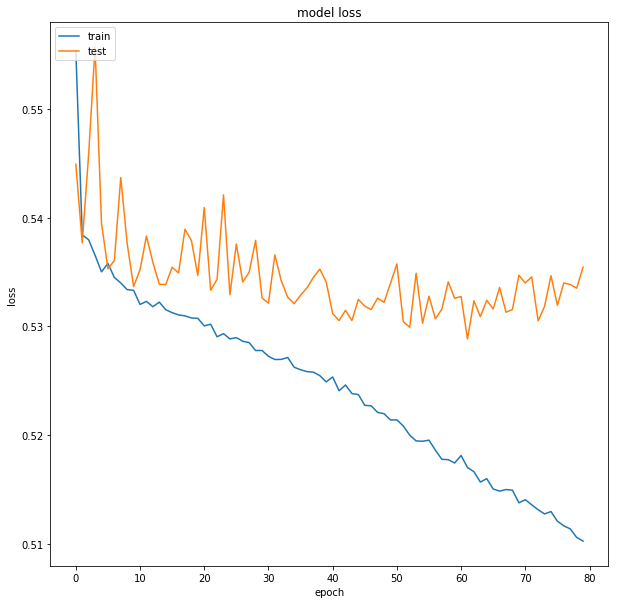

In [12]:
plot_loss_history(history)

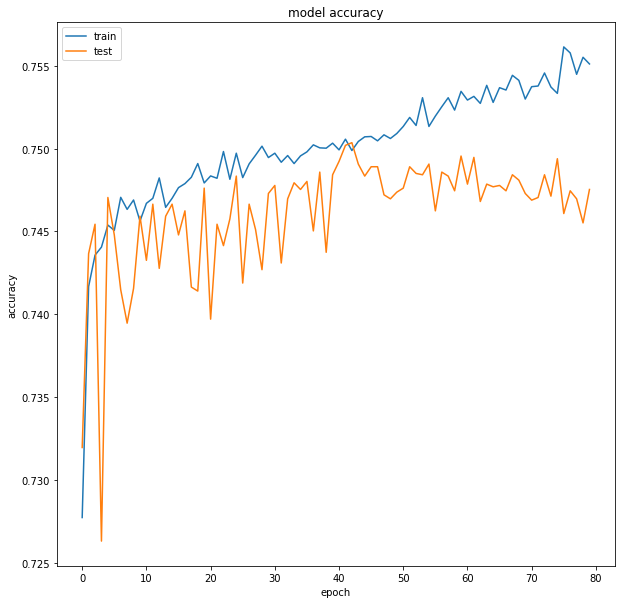

In [13]:
plot_accuracy_history(history)

In [14]:
model.save('model_5min_btc_eth.h5')